In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import os

output = "results"
os.makedirs(output, exist_ok=True)

In [82]:
df = pd.read_csv('performance_results.csv', header=0)

In [83]:
distinct_structures = [struct for struct in df['DataStructure'].unique()]
distinct_operations = df['Operation'].unique()

# Convert microseconds to milliseconds
df['Time_Milliseconds'] = (df['Time_Microseconds'] / 1000)
df['Memory_KB'] = (df['Memory_KB'] / 1000)

# Get unique data sizes for x-axis ticks
unique_data_sizes = sorted(df['DataSize'].unique())

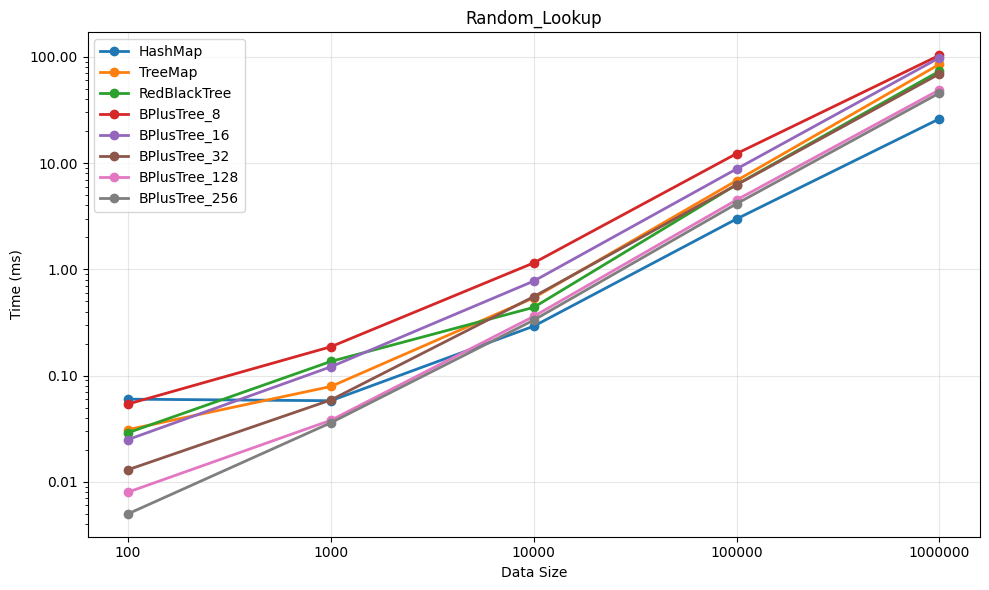

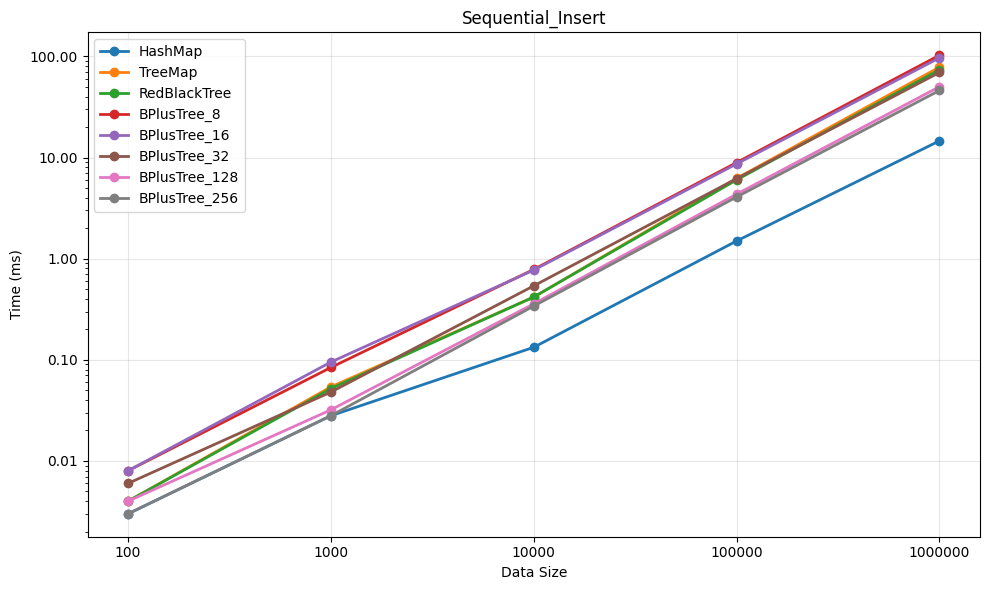

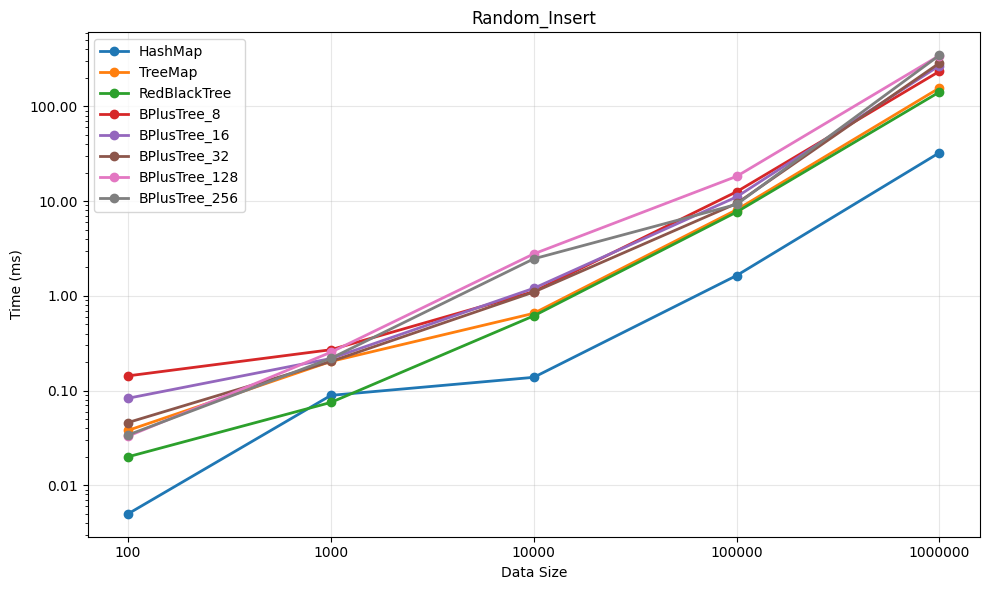

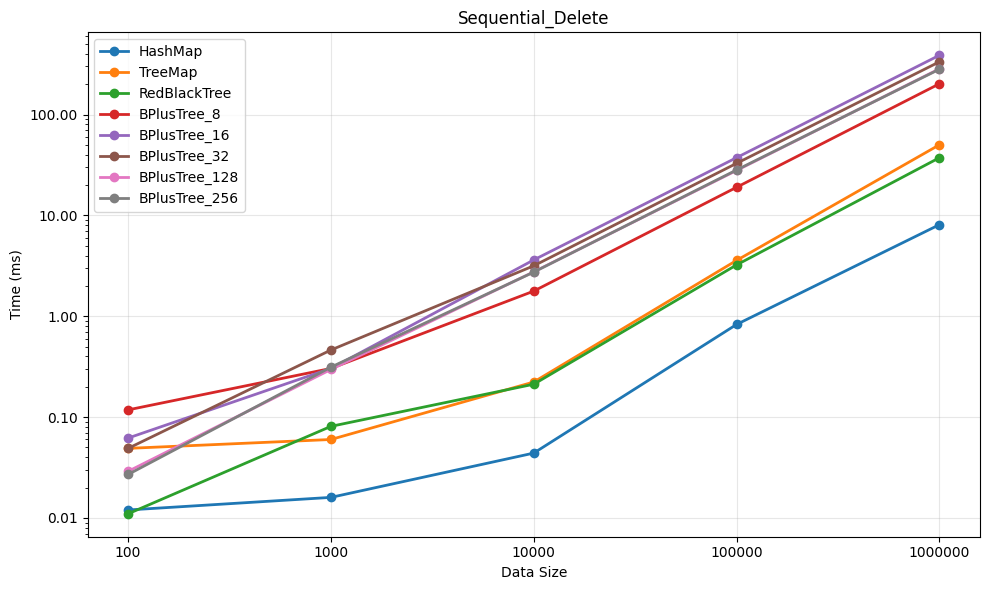

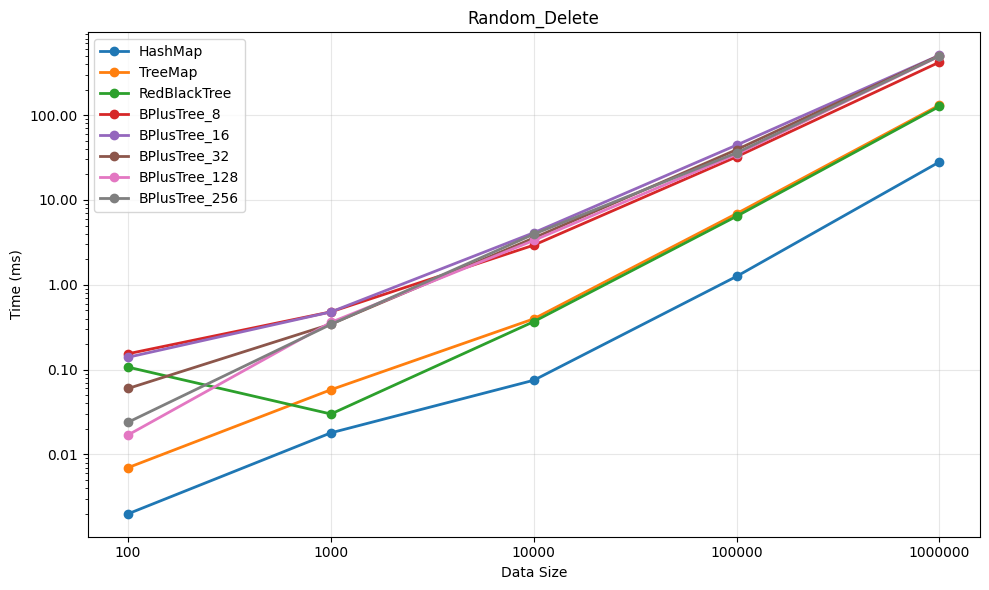

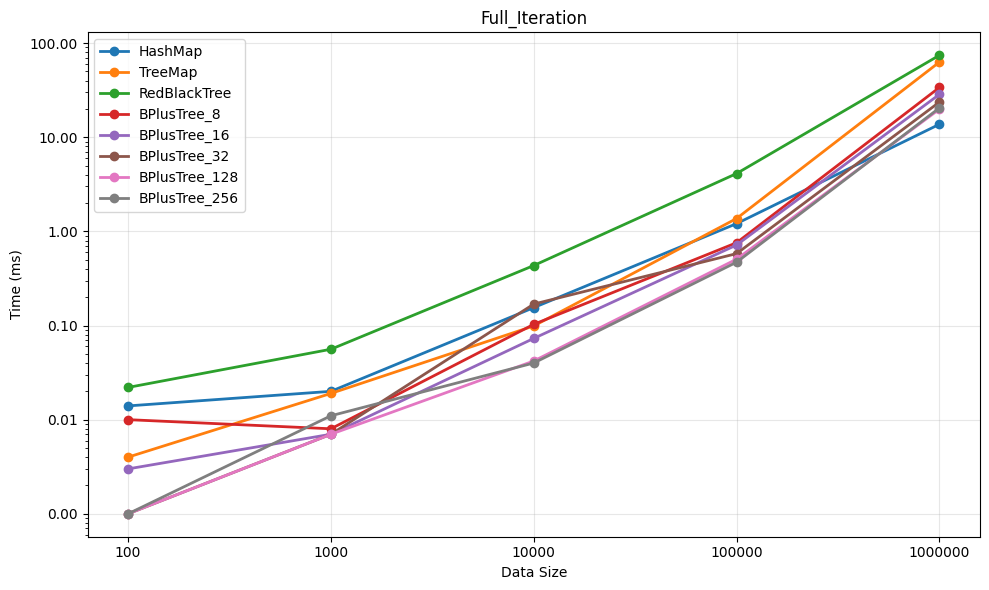

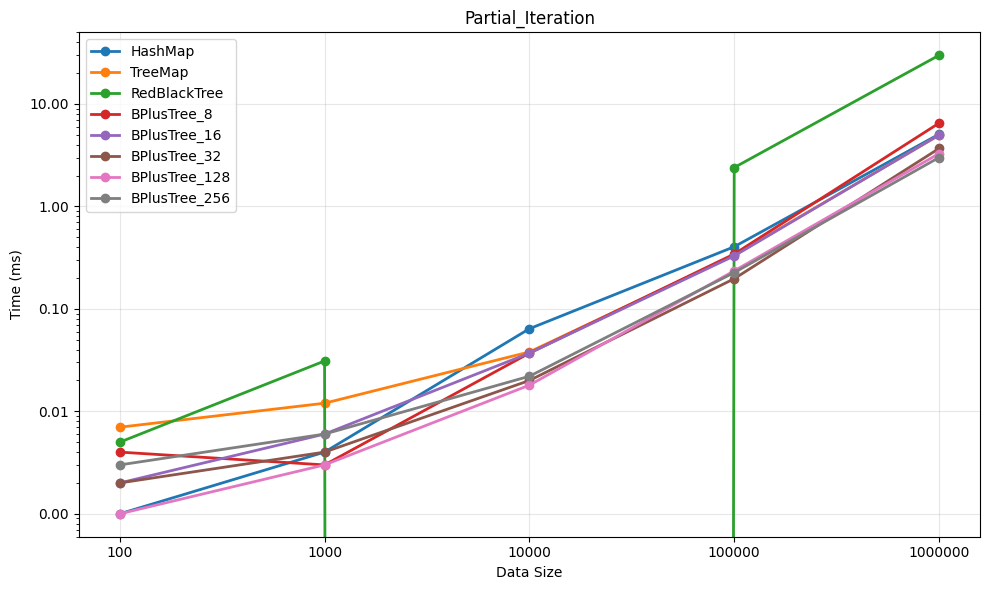

In [84]:
use_logarithmic_axes = True

# Create separate figures for each operation
for operation in distinct_operations:
    plt.figure(figsize=(10, 6))
    
    # Filter data for current operation
    op_data = df[df['Operation'] == operation]
    
    # Plot each data structure
    for structure in distinct_structures:
        struct_data = op_data[op_data['DataStructure'] == structure]
        if not struct_data.empty:
            # Map data sizes to categorical positions
            x_positions = [unique_data_sizes.index(size) for size in struct_data['DataSize']]
            plt.plot(x_positions, struct_data['Time_Milliseconds'], 
                   marker='o', label=structure, linewidth=2, markersize=6)
    
    plt.xlabel('Data Size')
    plt.ylabel('Time (ms)')
    plt.title(f'{operation}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Set x-axis to show only the unique data sizes as discrete points with equal spacing
    plt.xticks(range(len(unique_data_sizes)), [str(size) for size in unique_data_sizes])
    
    # Apply logarithmic scale if enabled
    if use_logarithmic_axes:
        plt.yscale('log')
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2f}'))
    else:
        # Format y-axis to show 2 decimal places
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2f}'))
    
    plt.tight_layout()

    path = f"{output}/time/{ "log" if use_logarithmic_axes else "normal"}/{operation.replace(' ', '_')}.png"
    os.makedirs(os.path.dirname(path), exist_ok=True)
    plt.savefig(path)
    plt.show()
    plt.close()

